##### 문제1. 코랩 환경설정  
- Colab 노트북에서는 그래프에서 한글을 표현하기 위해 추가적인 설정이 필요합니다. 
  - 한글폰트를 설치하세요
  - 폰트 경로를 바탕으로 font manager를 설정하세요

In [64]:
## 주피터 노트북 한글 폰트

# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    plt.rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    plt.rc('font', family=font_name)
elif your_os == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
# # 그래프에서 한글표현을 위해 폰트를 설치합니다.
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [ ]:
# import matplotlib.pyplot as plt  # 그래프 그리는 용도
# import matplotlib.font_manager as fm  # 폰트 관련 용도
# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)

# plt.rc('font', family=font_name)

# fm._rebuild()

In [ ]:
# import seaborn as sns
# # seaborn 한글 폰트 설정 
# sns.set(font=font_name, 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

# 1. 데이터 전처리

서울시에서 제공하는 공공 데이터 중 구별 범죄에 대한 데이터를 분석해보는 시간을 갖겠습니다.

먼저 데이터를 가져옵니다.

1. 서울 열린 데이터 광장 (data.seoul.go.kr) 사이트 접속합니다
2. '서울시 5대 범죄 발생현황 통계' 검색합니다
3. 기간 설정(2014~2019) 후 조회를 누릅니다
4. 데이터 내려받기(TXT)를 클릭합니다

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [4]:
!gdown --id 1T8YQHDfoGxQ6C6OKqHRWlKABngCxW-sO


zsh:1: command not found: gdown


##### 문제2. 데이터 불러오기
- 위에서 다운받은 데이터를 불러오세요. 

In [31]:
import pandas as pd

seoul_crime = pd.read_csv("/Users/kim-yewon/Desktop/skkdt/데이터 분석/SeoulCrime_20142019.txt", sep = '\t')
seoul_crime

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2014,합계,"130,674","79,061",158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
2,2014,종로구,"5,021","4,610",3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
3,2014,중구,"5,231","3,188",6,5,13,13,221,161,"2,576",887,"2,415","2,122"
4,2014,용산구,"3,799","2,340",1,2,7,7,213,169,"1,560",522,"2,018","1,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019,관악구,"5,328","3,810",13,10,10,11,408,335,"2,223","1,085","2,674","2,369"
153,2019,서초구,"5,542","3,750",5,5,7,5,616,412,"2,270","1,118","2,644","2,210"
154,2019,강남구,"7,304","5,069",5,3,5,6,666,562,"2,970","1,339","3,658","3,159"
155,2019,송파구,"5,698","3,799",7,8,10,10,273,230,"2,416","1,016","2,992","2,535"


##### 문제3. 칼럼명 정리하기

데이터의 칼럼명이 두줄로 되어있습니다.

그러므로 칼럼명을 한줄로 다시 정의해주고 데이터의 첫번째 행은 데이터가 아닌 칼럼 명이므로 삭제하겠습니다.

In [32]:
new_cols = ['기간','자치구','합계 발생','합계 검거',
           '살인 발생', '살인 검거', '강도 발생', '강도 검거','강간/추행 발생',
           '강간/추행 검거', '절도 발생', '절도 검거','폭력 발생', '폭력 검거']
len(new_cols)

14

In [33]:
 #새로운 칼럼명 적용
seoul_crime.columns = new_cols
seoul_crime.head()

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2014,합계,"130,674","79,061",158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
2,2014,종로구,"5,021","4,610",3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
3,2014,중구,"5,231","3,188",6,5,13,13,221,161,"2,576",887,"2,415","2,122"
4,2014,용산구,"3,799","2,340",1,2,7,7,213,169,"1,560",522,"2,018","1,640"


In [34]:
#첫번째 행 삭제

seoul_crime.drop(index=0, axis=0, inplace=True)
# 확인
seoul_crime


,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
1,2014,합계,"130,674","79,061",158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
2,2014,종로구,"5,021","4,610",3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
3,2014,중구,"5,231","3,188",6,5,13,13,221,161,"2,576",887,"2,415","2,122"
4,2014,용산구,"3,799","2,340",1,2,7,7,213,169,"1,560",522,"2,018","1,640"
5,2014,성동구,"3,582","2,048",1,1,5,6,141,103,"1,753",529,"1,682","1,409"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019,관악구,"5,328","3,810",13,10,10,11,408,335,"2,223","1,085","2,674","2,369"
153,2019,서초구,"5,542","3,750",5,5,7,5,616,412,"2,270","1,118","2,644","2,210"
154,2019,강남구,"7,304","5,069",5,3,5,6,666,562,"2,970","1,339","3,658","3,159"
155,2019,송파구,"5,698","3,799",7,8,10,10,273,230,"2,416","1,016","2,992","2,535"


##### 문제4. 결측치 확인하기 

데이터에 결측치가 있는지 확인해봅니다.

In [35]:
seoul_crime.isnull().sum()

기간          0
자치구         0
합계 발생       0
합계 검거       0
살인 발생       0
살인 검거       0
강도 발생       0
강도 검거       0
강간/추행 발생    0
강간/추행 검거    0
절도 발생       0
절도 검거       0
폭력 발생       0
폭력 검거       0
dtype: int64

##### 문제5. 데이터 타입 확인하기
현재 데이터 타입이 어떻게 설정되어 있는지 확인해봅니다.

In [36]:
display(seoul_crime.head())

# 데이터 타입 확인하기 
seoul_crime.info()

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
1,2014,합계,"130,674","79,061",158,152,343,299,"5,462","4,957","59,393","19,120","65,318","54,533"
2,2014,종로구,"5,021","4,610",3,7,12,15,226,948,"2,272","1,281","2,508","2,359"
3,2014,중구,"5,231","3,188",6,5,13,13,221,161,"2,576",887,"2,415","2,122"
4,2014,용산구,"3,799","2,340",1,2,7,7,213,169,"1,560",522,"2,018","1,640"
5,2014,성동구,"3,582","2,048",1,1,5,6,141,103,"1,753",529,"1,682","1,409"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 1 to 156
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        156 non-null    object
 1   자치구       156 non-null    object
 2   합계 발생     156 non-null    object
 3   합계 검거     156 non-null    object
 4   살인 발생     156 non-null    object
 5   살인 검거     156 non-null    object
 6   강도 발생     156 non-null    object
 7   강도 검거     156 non-null    object
 8   강간/추행 발생  156 non-null    object
 9   강간/추행 검거  156 non-null    object
 10  절도 발생     156 non-null    object
 11  절도 검거     156 non-null    object
 12  폭력 발생     156 non-null    object
 13  폭력 검거     156 non-null    object
dtypes: object(14)
memory usage: 17.2+ KB


모든 칼럼의 데이터 타입이 object 로 되어있습니다. 

특히 숫자와 쉽표가 함께 있는 이러한 경우 아래 예시와 같이 쉼표(,)로 인해 숫자형으로 쉽게 변환하지 못합니다.


##### 문제6. 데이터 형 변환하기
- 기간과 자치구 칼럼을 제외한 나머지 데이터를 int형으로 변환하세요

In [11]:
#예시: 이렇게 쉼표가 있으면 바로 형변환을 적용할 수 없습니다
int('1,409')

ValueError: invalid literal for int() with base 10: '1,409'

In [37]:
# "-" 와 ","를 없애야 int형 변환이 가능합니다

#해당 로우의 개수 확인
seoul_crime[seoul_crime['살인 검거']=='-'] #확인


,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
81,2017,중구,"4,184","2,851",1,-,9,9,267,149,"1,846",889,"2,061","1,804"


In [ ]:
seoul_crime.info()

'살인 검거' 칼럼에서 '-'값이 있어 이를 int 형으로 변환할수 없다는 에러 메시지가 떴습니다. 

에러를 해결하기 위해 '-' 값을 0으로 바꿔주겠습니다.

In [38]:
# 어떻게 해야 형 변환이 가능할까요? 직접 풀어보세요! 
df = seoul_crime.copy()
for col in df.columns[2:]: # new_cols:
    df[col] = df[col].apply(lambda x : x.replace(',', ''))
df['살인 검거'] = df['살인 검거'].apply(lambda x : 0 if x == '-' else x)
df[df['살인 검거']=='-']
df.head()

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
1,2014,합계,130674,79061,158,152,343,299,5462,4957,59393,19120,65318,54533
2,2014,종로구,5021,4610,3,7,12,15,226,948,2272,1281,2508,2359
3,2014,중구,5231,3188,6,5,13,13,221,161,2576,887,2415,2122
4,2014,용산구,3799,2340,1,2,7,7,213,169,1560,522,2018,1640
5,2014,성동구,3582,2048,1,1,5,6,141,103,1753,529,1682,1409


In [39]:
for col in df.columns[2:]: # new_cols:
    df[col] = df[col].apply(pd.to_numeric, errors = 'coerce')
display(df.head())
df.info()

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
1,2014,합계,130674,79061,158,152,343,299,5462,4957,59393,19120,65318,54533
2,2014,종로구,5021,4610,3,7,12,15,226,948,2272,1281,2508,2359
3,2014,중구,5231,3188,6,5,13,13,221,161,2576,887,2415,2122
4,2014,용산구,3799,2340,1,2,7,7,213,169,1560,522,2018,1640
5,2014,성동구,3582,2048,1,1,5,6,141,103,1753,529,1682,1409


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 1 to 156
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        156 non-null    object
 1   자치구       156 non-null    object
 2   합계 발생     156 non-null    int64 
 3   합계 검거     156 non-null    int64 
 4   살인 발생     156 non-null    int64 
 5   살인 검거     156 non-null    int64 
 6   강도 발생     156 non-null    int64 
 7   강도 검거     156 non-null    int64 
 8   강간/추행 발생  156 non-null    int64 
 9   강간/추행 검거  156 non-null    int64 
 10  절도 발생     156 non-null    int64 
 11  절도 검거     156 non-null    int64 
 12  폭력 발생     156 non-null    int64 
 13  폭력 검거     156 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 17.2+ KB


우리는 추후 새로운 칼럼을 만들기 위하여 지금 데이터 타입을 옳게 바꿔주겠습니다.

In [40]:
# 확인해봅니다
display(df.head())

df.dtypes

seoul_crime = df.copy()

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
1,2014,합계,130674,79061,158,152,343,299,5462,4957,59393,19120,65318,54533
2,2014,종로구,5021,4610,3,7,12,15,226,948,2272,1281,2508,2359
3,2014,중구,5231,3188,6,5,13,13,221,161,2576,887,2415,2122
4,2014,용산구,3799,2340,1,2,7,7,213,169,1560,522,2018,1640
5,2014,성동구,3582,2048,1,1,5,6,141,103,1753,529,1682,1409


##### 문제7. 발생대비검거 칼럼 생성하기


이제 각 범죄별 검거와 발생 건수를 포함하는 '발생대비검거' 칼럼을 생성해보겠습니다.

$$ 발생대비검거 = \frac{검거 수}{발생 수} $$

In [41]:
df.columns

Index(['기간', '자치구', '합계 발생', '합계 검거', '살인 발생', '살인 검거', '강도 발생', '강도 검거',
       '강간/추행 발생', '강간/추행 검거', '절도 발생', '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [42]:
seoul_crime['합계 발생대비검거'] = df['합계 검거'] / df['합계 발생']


In [43]:
seoul_crime['살인 발생대비검거'] = (df['살인 검거'] / df['살인 발생'])*100
seoul_crime['강도 발생대비검거'] = (df['강도 검거'] / df['강도 발생'])*100
seoul_crime['강간/추행 발생대비검거'] = (df['강간/추행 검거'] / df['강간/추행 발생'])*100
seoul_crime['절도 발생대비검거'] = (df['절도 검거'] / df['절도 발생'])*100
seoul_crime['폭력 발생대비검거'] = (df['폭력 검거'] / df['폭력 발생'])*100

seoul_crime

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,합계 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,79061,158,152,343,299,5462,4957,59393,19120,65318,54533,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,4610,3,7,12,15,226,948,2272,1281,2508,2359,0.918144,233.333333,125.000000,419.469027,56.382042,94.059011
3,2014,중구,5231,3188,6,5,13,13,221,161,2576,887,2415,2122,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495
4,2014,용산구,3799,2340,1,2,7,7,213,169,1560,522,2018,1640,0.615952,200.000000,100.000000,79.342723,33.461538,81.268583
5,2014,성동구,3582,2048,1,1,5,6,141,103,1753,529,1682,1409,0.571748,100.000000,120.000000,73.049645,30.176840,83.769322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019,관악구,5328,3810,13,10,10,11,408,335,2223,1085,2674,2369,0.715090,76.923077,110.000000,82.107843,48.807917,88.593867
153,2019,서초구,5542,3750,5,5,7,5,616,412,2270,1118,2644,2210,0.676651,100.000000,71.428571,66.883117,49.251101,83.585477
154,2019,강남구,7304,5069,5,3,5,6,666,562,2970,1339,3658,3159,0.694003,60.000000,120.000000,84.384384,45.084175,86.358666
155,2019,송파구,5698,3799,7,8,10,10,273,230,2416,1016,2992,2535,0.666725,114.285714,100.000000,84.249084,42.052980,84.725936


##### 문제8. 각 범죄의 '검거' 칼럼 삭제하기

In [44]:
display(seoul_crime.head(3)) #삭제 전
seoul_crime.drop(['합계 검거','살인 검거', '강도 검거', '강간/추행 검거', '절도 검거', '폭력 검거'], axis=1, inplace=True)
# 발생대비검거 칼럼을 만들었기 때문에 각 범죄의 '검거' 칼럼을 삭제하겠습니다.

        
display(seoul_crime.head(3)) #삭제 후

,기간,자치구,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간/추행 발생,강간/추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,합계 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,79061,158,152,343,299,5462,4957,59393,19120,65318,54533,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,4610,3,7,12,15,226,948,2272,1281,2508,2359,0.918144,233.333333,125.000000,419.469027,56.382042,94.059011
3,2014,중구,5231,3188,6,5,13,13,221,161,2576,887,2415,2122,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495


,기간,자치구,합계 발생,살인 발생,강도 발생,강간/추행 발생,절도 발생,폭력 발생,합계 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,233.333333,125.000000,419.469027,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495


##### 문제9. 각 칼럼의 데이터 통계 확인하기

In [45]:
# 각 칼럼의 데이터 통계를 살펴봅니다
seoul_crime.describe()

,합계 발생,살인 발생,강도 발생,강간/추행 발생,절도 발생,폭력 발생,합계 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,8825.192308,11.410256,17.038462,471.243590,3642.282051,4683.217949,0.700369,98.662903,102.450120,95.330089,46.310303,85.908138
std,21397.088674,27.719766,44.128534,1145.274366,8916.732941,11325.422450,0.091032,23.451155,40.037641,80.188125,10.133448,3.320085
min,1999.000000,1.000000,1.000000,90.000000,633.000000,1224.000000,0.497501,0.000000,40.909091,43.686869,21.076447,78.433784
25%,3794.500000,4.000000,5.000000,170.000000,1481.500000,2046.500000,0.647415,88.888889,80.000000,73.850108,39.326476,83.655256
50%,4535.500000,6.000000,8.000000,215.500000,1853.000000,2409.500000,0.692786,100.000000,100.000000,82.232399,46.321508,85.533816
75%,5434.250000,8.000000,12.250000,297.750000,2341.000000,2832.750000,0.740984,100.000000,111.111111,88.047244,53.543150,87.554267
max,130674.000000,163.000000,343.000000,6963.000000,59393.000000,65318.000000,1.093665,233.333333,350.000000,558.102767,70.561056,97.806813


##### 문제10. 이상치 확인하기

문제 9의 결과를 살펴보고 이상치가 있는지 확인해보세요     

In [17]:
#@title
# 발생대비검거 칼럼은 0~100 값을 가져야 합니다. 

# 그런데 합계, 살인, 강도, 강간/추행 발생대비검거은 max 값이 100보다 큽니다. 

# -> 이유가 무엇일까요? 발생 대비 검거율이 100 이 상이라는 것은 검거수 > 발생수 보다 높아 생긴 이상치

# -> 어떻게 처리하면 좋을까요? 검거율이 100 이상이면 100으로 치환...

In [46]:
outlier_col = ['살인 발생대비검거', '강도 발생대비검거', '강간/추행 발생대비검거', '절도 발생대비검거', '폭력 발생대비검거']

for col in outlier_col:
    seoul_crime[col] = seoul_crime[col].apply(lambda x : 100 if x >= 100 else x)

seoul_crime.describe()
    


,합계 발생,살인 발생,강도 발생,강간/추행 발생,절도 발생,폭력 발생,합계 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,8825.192308,11.410256,17.038462,471.243590,3642.282051,4683.217949,0.700369,92.876375,89.369309,80.288549,46.310303,85.908138
std,21397.088674,27.719766,44.128534,1145.274366,8916.732941,11325.422450,0.091032,13.767207,15.127595,12.004437,10.133448,3.320085
min,1999.000000,1.000000,1.000000,90.000000,633.000000,1224.000000,0.497501,0.000000,40.909091,43.686869,21.076447,78.433784
25%,3794.500000,4.000000,5.000000,170.000000,1481.500000,2046.500000,0.647415,88.888889,80.000000,73.850108,39.326476,83.655256
50%,4535.500000,6.000000,8.000000,215.500000,1853.000000,2409.500000,0.692786,100.000000,100.000000,82.232399,46.321508,85.533816
75%,5434.250000,8.000000,12.250000,297.750000,2341.000000,2832.750000,0.740984,100.000000,100.000000,88.047244,53.543150,87.554267
max,130674.000000,163.000000,343.000000,6963.000000,59393.000000,65318.000000,1.093665,100.000000,100.000000,100.000000,70.561056,97.806813


##### 문제11. 칼럼이름 수정하기

이제 칼럼 이름을 수정하여 최종적으로 사용할 데이터를 완성시키겠습니다.

In [47]:
# print(seoul_crime.columns)
display(seoul_crime.head(3)) #전

new_cols = ['기간','자치구','총 범죄', '살인', '강도', '강간/추행', '절도', '폭력', 
            '총 발생대비검거','살인 발생대비검거','강도 발생대비검거', '강간/추행 발생대비검거', '절도 발생대비검거', '폭력 발생대비검거']

# 적용
seoul_crime.columns = new_cols
display(seoul_crime.head(3)) #후

,기간,자치구,합계 발생,살인 발생,강도 발생,강간/추행 발생,절도 발생,폭력 발생,합계 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.000000,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495


,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.000000,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495


##### 문제12. '합계' 행 삭제하기

In [48]:
# 합계 행 삭제합니다

crime_data = seoul_crime.drop(1, axis=0)
crime_data

,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.000000,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495
4,2014,용산구,3799,1,7,213,1560,2018,0.615952,100.000000,100.000000,79.342723,33.461538,81.268583
5,2014,성동구,3582,1,5,141,1753,1682,0.571748,100.000000,100.000000,73.049645,30.176840,83.769322
6,2014,광진구,6268,8,16,249,3167,2828,0.563338,100.000000,100.000000,79.919679,31.607199,81.329562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019,관악구,5328,13,10,408,2223,2674,0.715090,76.923077,100.000000,82.107843,48.807917,88.593867
153,2019,서초구,5542,5,7,616,2270,2644,0.676651,100.000000,71.428571,66.883117,49.251101,83.585477
154,2019,강남구,7304,5,5,666,2970,3658,0.694003,60.000000,100.000000,84.384384,45.084175,86.358666
155,2019,송파구,5698,7,10,273,2416,2992,0.666725,100.000000,100.000000,84.249084,42.052980,84.725936


#2. 범죄 발생 횟수

In [49]:
# 원본을 사용해도 괜찮으나 지금은 복사해서 사용하겠습니다.
crime_data = seoul_crime.copy()
crime_data

,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.000000,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495
4,2014,용산구,3799,1,7,213,1560,2018,0.615952,100.000000,100.000000,79.342723,33.461538,81.268583
5,2014,성동구,3582,1,5,141,1753,1682,0.571748,100.000000,100.000000,73.049645,30.176840,83.769322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019,관악구,5328,13,10,408,2223,2674,0.715090,76.923077,100.000000,82.107843,48.807917,88.593867
153,2019,서초구,5542,5,7,616,2270,2644,0.676651,100.000000,71.428571,66.883117,49.251101,83.585477
154,2019,강남구,7304,5,5,666,2970,3658,0.694003,60.000000,100.000000,84.384384,45.084175,86.358666
155,2019,송파구,5698,7,10,273,2416,2992,0.666725,100.000000,100.000000,84.249084,42.052980,84.725936


우리는 서울시의 구별 범죄 데이터를 통해 범죄의 발생 자체가 적거나 혹은

범죄가 발생했더라도 검거가 잘되는 일명 '안전한' 구가 어딘지 알아 볼 수 있습니다. (그 반대도 가능합니다) 

## 1. 가장 많이 일어나는 지역과 가장 적게 일어나는 지역

그럼 단순히 전체 범죄의 수로만 따졌을때 

가장 범죄가 많이 일어나는 서울시 구와 가장 범죄가 적게 일어나는 서울시 구를 각각 5개씩 찾아보겠습니다.

##### 문제13. 각 구가 지난 6년간 top5에 들었던 횟수를 카운팅하세요

(예시)
-  데이터 -> 강남구 : 2014 top1, 2015 top10, 2016 top3 
- 출력 -> 강남구 2회 


In [50]:
sort_data = crime_data[df['기간'] == '2015'].sort_values('총 범죄')
sort_data[:5]['자치구']

37     도봉구
31     성동구
45     금천구
30     용산구
40    서대문구
Name: 자치구, dtype: object

In [51]:
# 각 구가 
years = ['2014','2015','2016','2017','2018','2019']

high ={}
low = {}
for year in years:
    high_data = crime_data[df['기간'] == year].sort_values('총 범죄')['자치구'].values
    low_data =  crime_data[df['기간'] == year].sort_values('총 범죄', ascending=False)['자치구'].values
    high[year] = high_data[:5]
    low[year] = low_data[:5]

area = crime_data['자치구'].unique()[1:]

for a in area:
    cnt = 0
    for year in years:
        if a in high[year]:
            cnt += 1
    print("{0} {1}회".format(a, cnt))


종로구 0회
중구 0회
용산구 2회
성동구 6회
광진구 0회
동대문구 0회
중랑구 0회
성북구 2회
강북구 0회
도봉구 6회
노원구 0회
은평구 0회
서대문구 5회
마포구 0회
양천구 0회
강서구 0회
구로구 0회
금천구 5회
영등포구 0회
동작구 4회
관악구 0회
서초구 0회
강남구 0회
송파구 0회
강동구 0회


In [52]:
# 힌트1 : filtering

# 2014년도의 데이터만 필터링하기 
crime_data[crime_data['기간'] == '2014'] 

,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.000000,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495
4,2014,용산구,3799,1,7,213,1560,2018,0.615952,100.000000,100.000000,79.342723,33.461538,81.268583
5,2014,성동구,3582,1,5,141,1753,1682,0.571748,100.000000,100.000000,73.049645,30.176840,83.769322
6,2014,광진구,6268,8,16,249,3167,2828,0.563338,100.000000,100.000000,79.919679,31.607199,81.329562
7,2014,동대문구,4363,12,13,141,1809,2388,0.660555,91.666667,61.538462,79.432624,37.368712,86.892797
8,2014,중랑구,5353,11,14,163,2390,2775,0.608817,90.909091,78.571429,72.392638,34.435146,82.774775
9,2014,성북구,4606,8,16,165,2130,2287,0.657403,62.500000,100.000000,77.575758,43.896714,84.827285
10,2014,강북구,4030,6,21,189,1494,2320,0.696278,83.333333,47.619048,80.423280,38.487282,88.965517


In [54]:
# 힌트2 : Sorting
# 범죄수가 많은 대로 정렬하기 
crime_data

,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.000000,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.000000,72.850679,34.433230,87.867495
4,2014,용산구,3799,1,7,213,1560,2018,0.615952,100.000000,100.000000,79.342723,33.461538,81.268583
5,2014,성동구,3582,1,5,141,1753,1682,0.571748,100.000000,100.000000,73.049645,30.176840,83.769322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019,관악구,5328,13,10,408,2223,2674,0.715090,76.923077,100.000000,82.107843,48.807917,88.593867
153,2019,서초구,5542,5,7,616,2270,2644,0.676651,100.000000,71.428571,66.883117,49.251101,83.585477
154,2019,강남구,7304,5,5,666,2970,3658,0.694003,60.000000,100.000000,84.384384,45.084175,86.358666
155,2019,송파구,5698,7,10,273,2416,2992,0.666725,100.000000,100.000000,84.249084,42.052980,84.725936


## 2. 시각화

matplotlib과 seaborn 라이브러리를 활용하여 위의 데이터프레임을 시각화해보겠습니다. 

In [55]:
crime_data[crime_data['자치구'] == '합계']
crime_data.drop([27, 53, 79, 105, 131], axis=0, inplace=True)

##### 문제14. 총 범죄수가 가장 많은 순으로 구 이름 리스트 생성하기

6년 간 총 범죄수가 많은 순으로 그래프를 시각화하기 위하여 순서리스트를 생성합니다. 

In [56]:
crime_data[crime_data['자치구'] == '합계']

,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
1,2014,합계,130674,158,343,5462,59393,65318,0.605025,96.202532,87.172012,90.754302,32.192346,83.488472


In [25]:
# 총 범죄 수 많은 순으로 정렬
# order_list



In [57]:
order_list = crime_data.groupby('자치구').agg('sum').sort_values('총 범죄', ascending=False)

/var/folders/yj/661v5ck10fs9l1w83h2th0300000gn/T/ipykernel_31858/883594263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_list = crime_data.groupby('자치구').agg('sum').sort_values('총 범죄', ascending=False)


In [62]:
order_list.reset_index(level='자치구', inplace=True)

KeyError: 'Requested level (자치구) does not match index name (None)'

### 1. 서울시 구별 총 범죄수

##### 문제15. 2014~2019 5년간 서울시 구별 총 범죄수 시각화하기

In [66]:
crime_data.drop(1, axis=0, inplace=True)

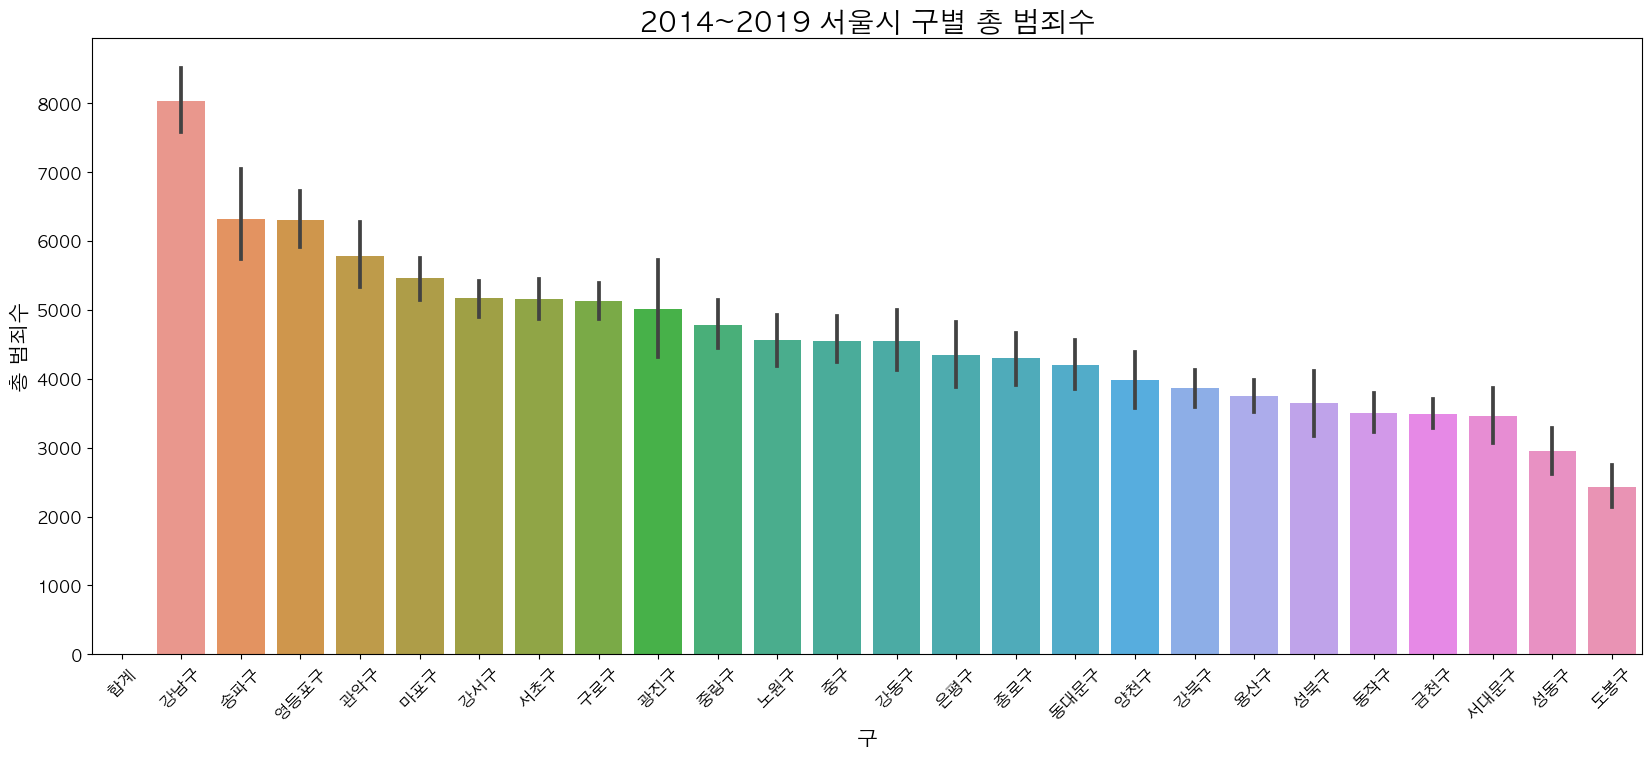

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,8)) # 그래프 크기 설정 

##########
sns.barplot(
    data = crime_data,
    x = '자치구',
    y = '총 범죄',
    order=order_list['자치구']
) 
##########

plt.title("2014~2019 서울시 구별 총 범죄수", fontsize=20) #제목
plt.xlabel('구', fontsize=15)  #x축 명
plt.ylabel('총 범죄수', fontsize=15) #y축 명

plt.xticks(rotation=45) #x축 라벨 글자 45도 회전
plt.xticks(fontsize=12) #x축 라벨 글자 크기
plt.yticks(fontsize=12) #y축 라벨 글자 크기

plt.show()

### 2. 서울시 구별 연도별 범죄 발생 횟수

5년 간 각 구별로 유형별 범죄수를 구분하여 표현해봅시다. 

##### 문제16. 각 구의 연도별 총 범죄수 시각화하세요
- 누적그래프 형태와 누적을 해제한 형태 두 가지 모두를 표현하세요.  

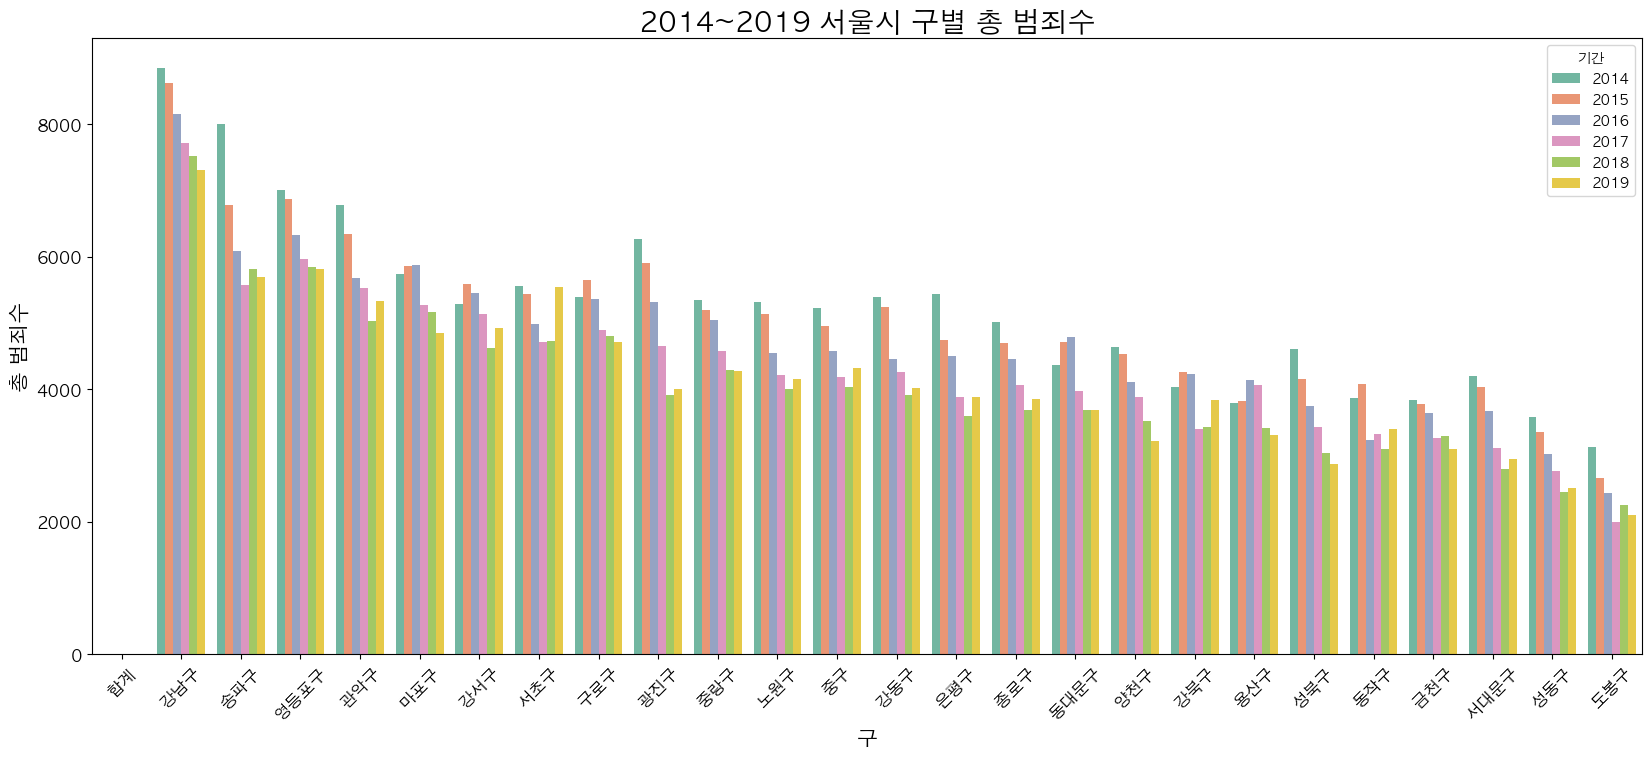

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,8)) # 그래프 크기 설정 
qualitative_colors = sns.color_palette("Set2", 6) # 컬러팔레트 설정 

##########
sns.barplot(
    data = crime_data,
    x = '자치구',
    y = '총 범죄',
    hue = '기간',
    order = order_list['자치구'], 
    palette = qualitative_colors
) 
##########

plt.title("2014~2019 서울시 구별 총 범죄수", fontsize=20) #제목
plt.xlabel('구', fontsize=15)  #x축 명
plt.ylabel('총 범죄수', fontsize=15) #y축 명

plt.xticks(rotation=45) #x축 라벨 글자 45도 회전
plt.xticks(fontsize=12) #x축 라벨 글자 크기
plt.yticks(fontsize=12) #y축 라벨 글자 크기
plt.show()

위의 그래프를 각 구별 누적그래프로 시각화해보겠습니다. 

In [69]:
import numpy as np

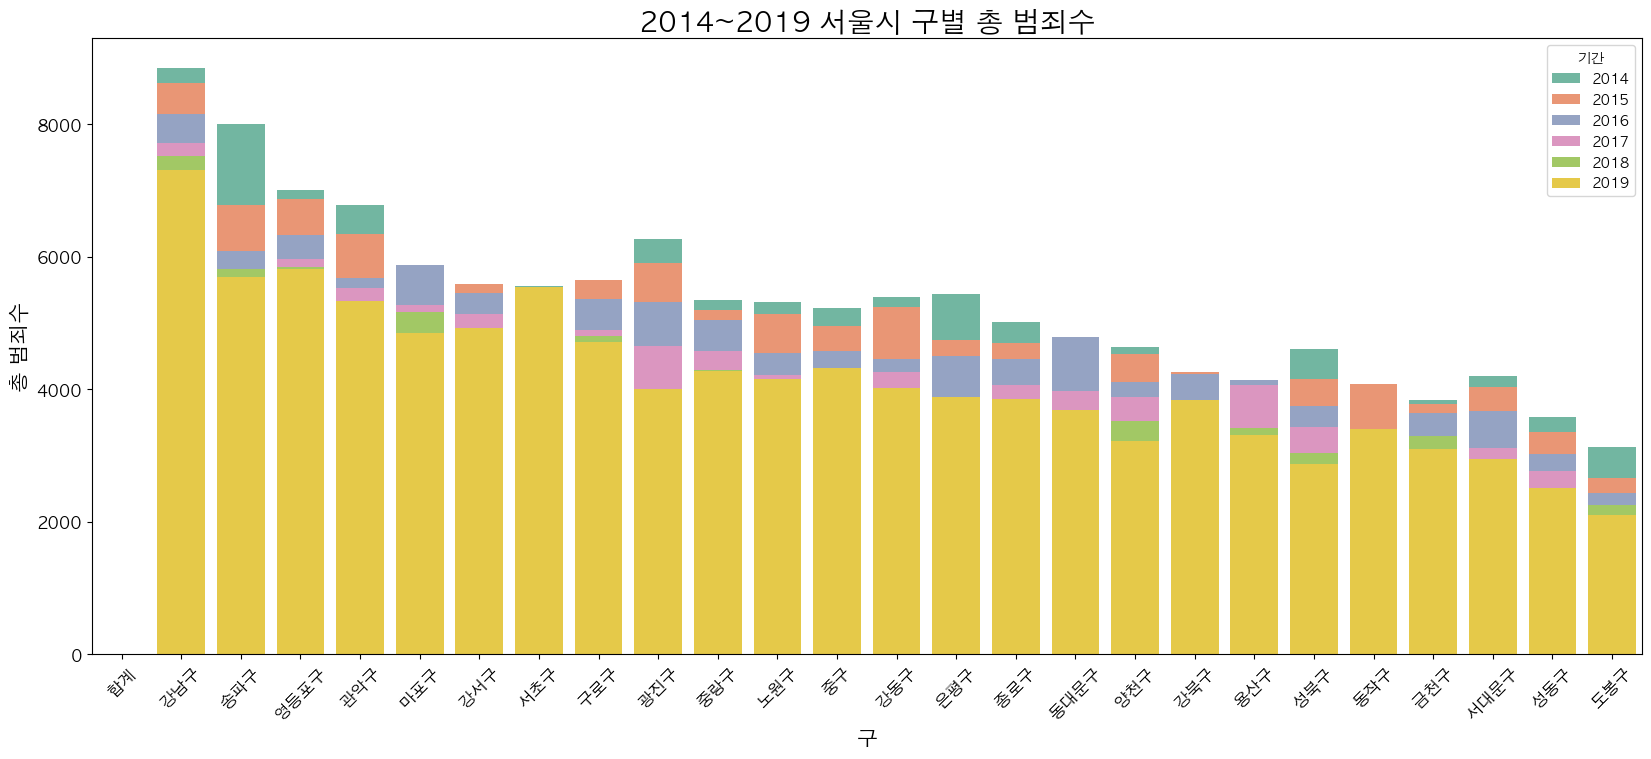

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,8)) # 그래프 크기 설정 
qualitative_colors = sns.color_palette("Set2", 6) # 컬러팔레트 설정 

##########
sns.barplot(
    data = crime_data,
    x = '자치구',
    y = '총 범죄',
    hue = '기간',
    order = order_list['자치구'], 
    palette = qualitative_colors,
    # 누적옵션 추가 
    dodge=False
) 
##########s.barplot(data=crime_data, x ='자치구', y='총 범죄', hue='기간', dodge=False, order=order_list, palette = qualitative_colors) # dodge=False 를 추가하여 누적그래프로 표현

plt.title("2014~2019 서울시 구별 총 범죄수", fontsize=20) #제목
plt.xlabel('구', fontsize=15)  #x축 명
plt.ylabel('총 범죄수', fontsize=15) #y축 명

plt.xticks(rotation=45) #x축 라벨 글자 45도 회전
plt.xticks(fontsize=12) #x축 라벨 글자 크기
plt.yticks(fontsize=12) #y축 라벨 글자 크기
plt.show()

### 서울시 구별 총범죄수 변화 추이

각 구별로 나누어서 그래프를 그려서, 각 구의 연도별 총 범죄수 변화 추이를 살펴봅시다. 

##### 문제17. 각 구의 연도별 총 범죄수 추이를 시각화하세요. 

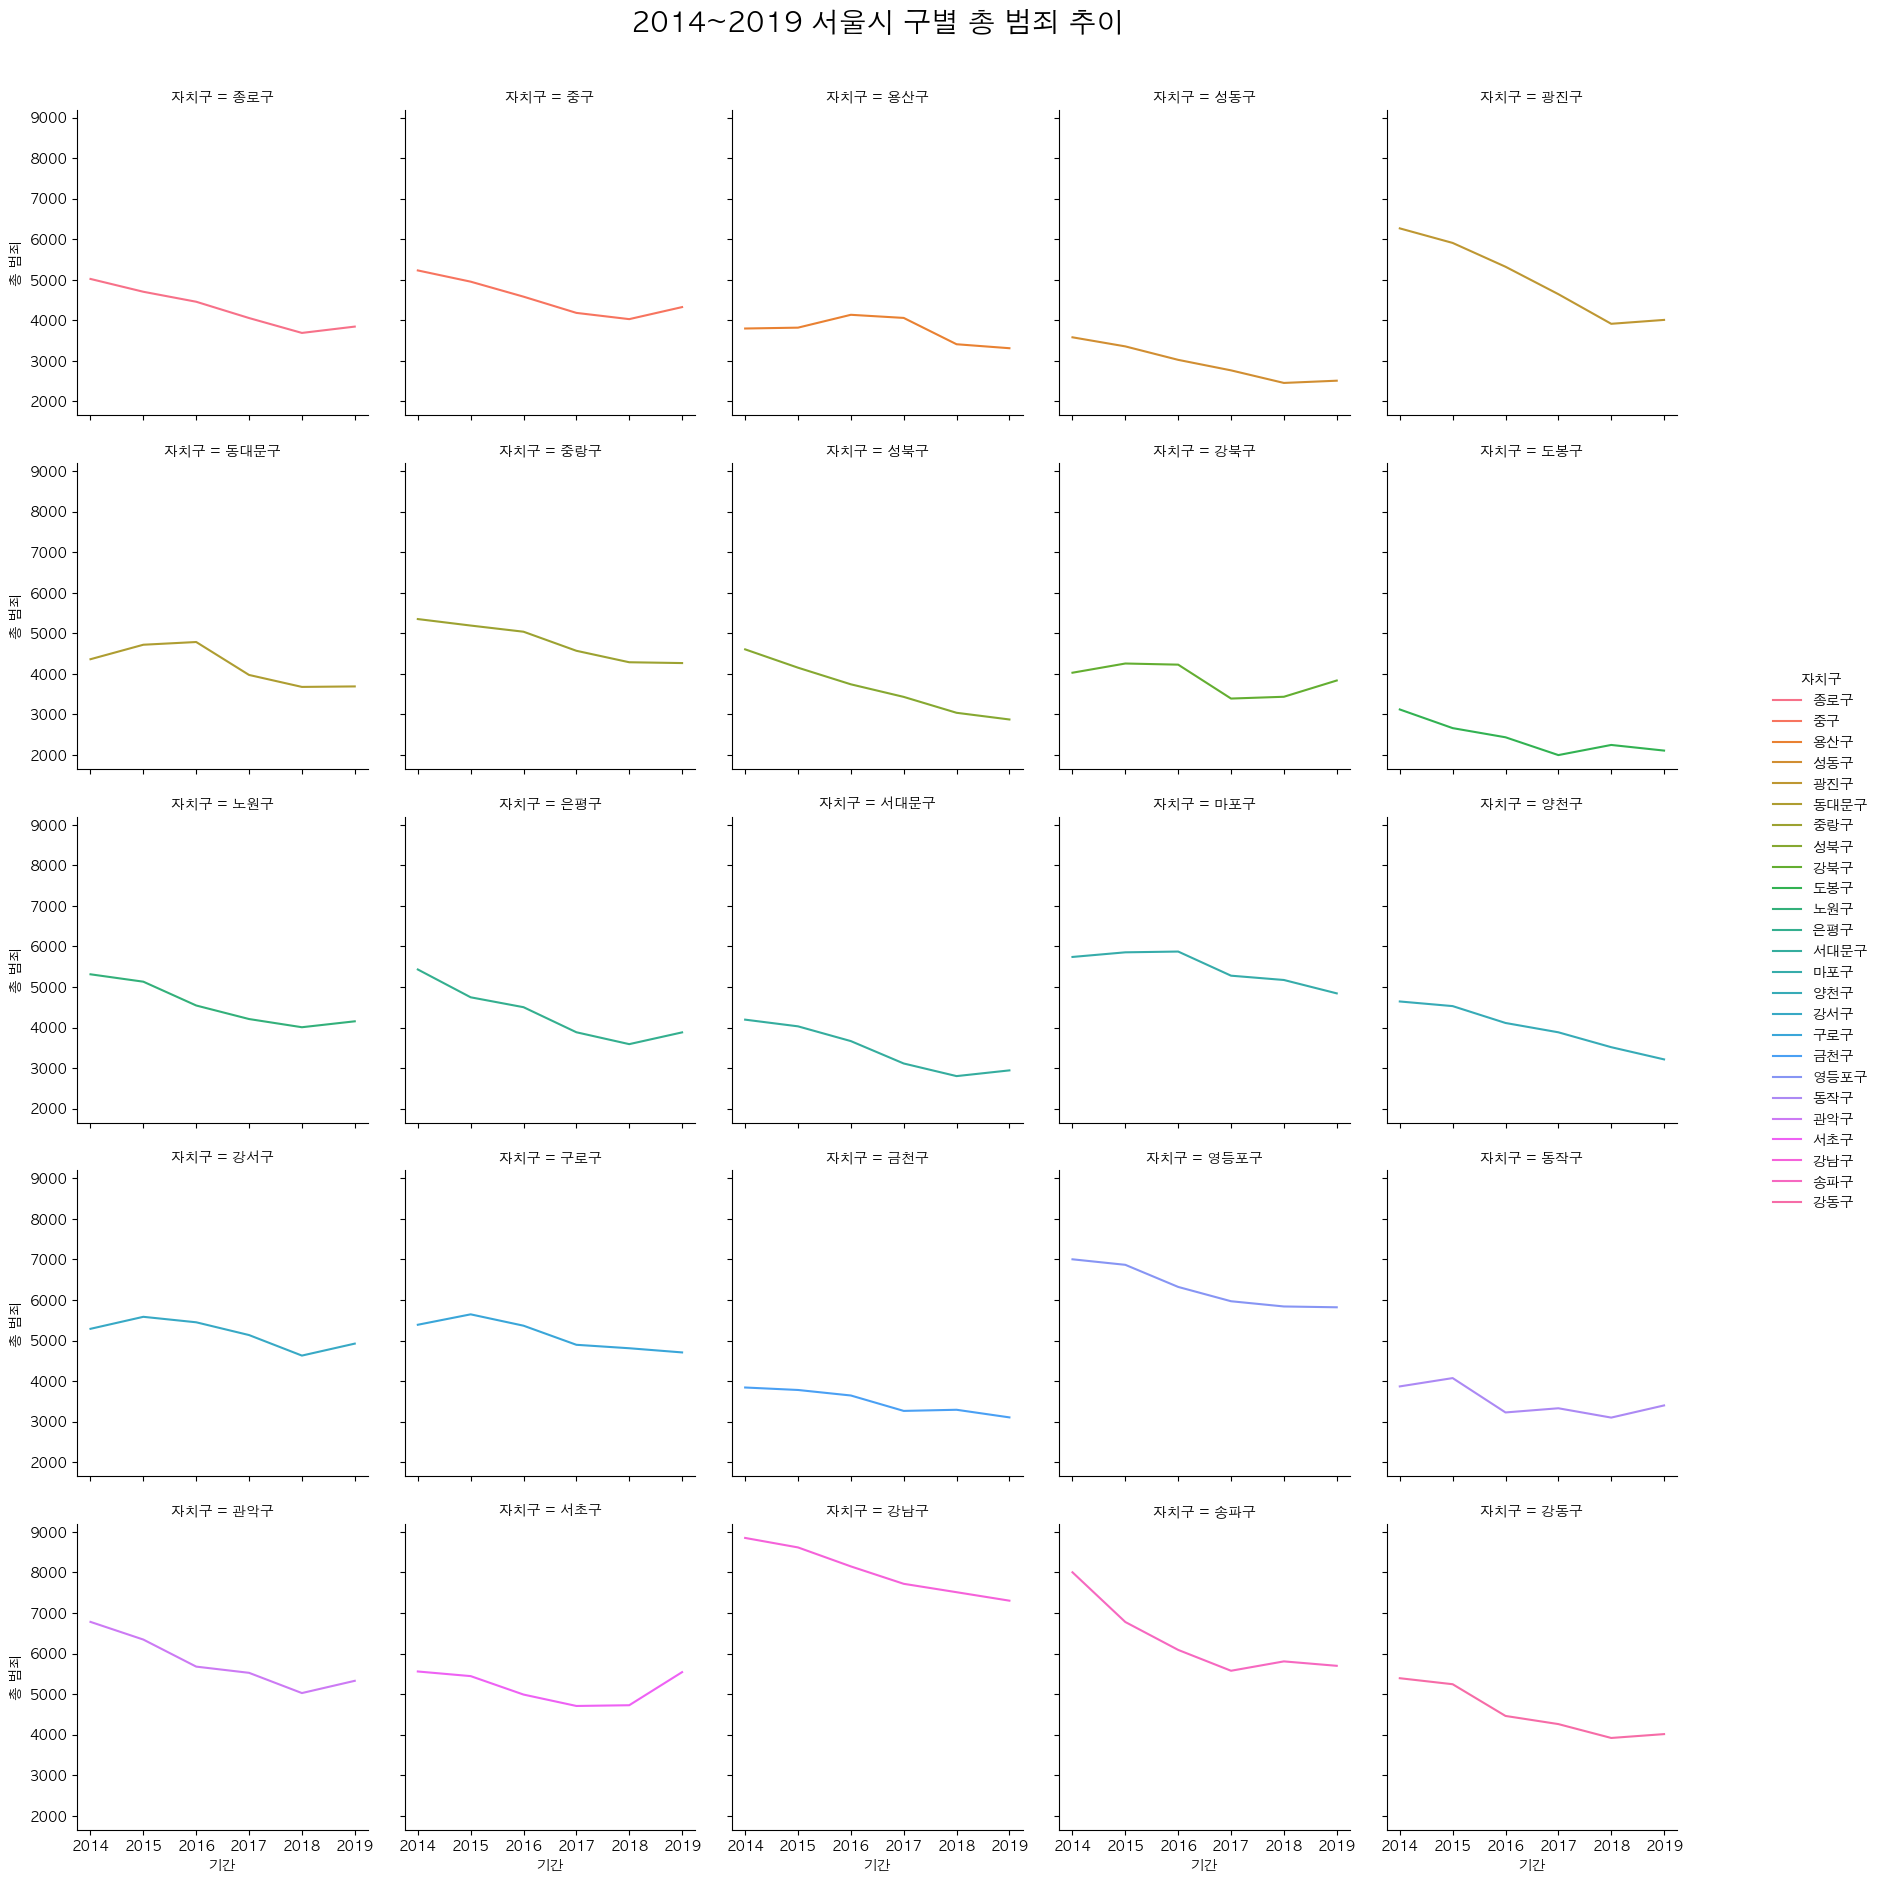

In [71]:
f = sns.relplot(
    data = crime_data,
    x = '기간',
    y = '총 범죄',
    hue = '자치구',
    col = '자치구',
    kind = 'line',
    col_wrap = 5,
    height = 3,
)

f.fig.suptitle('2014~2019 서울시 구별 총 범죄 추이', fontsize= 20) #제목
f.fig.set_size_inches(20, 20) # 그래프 크기 
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.07) # 그래프 여백 

plt.show()

하나의 그래프에 다 그려보세요

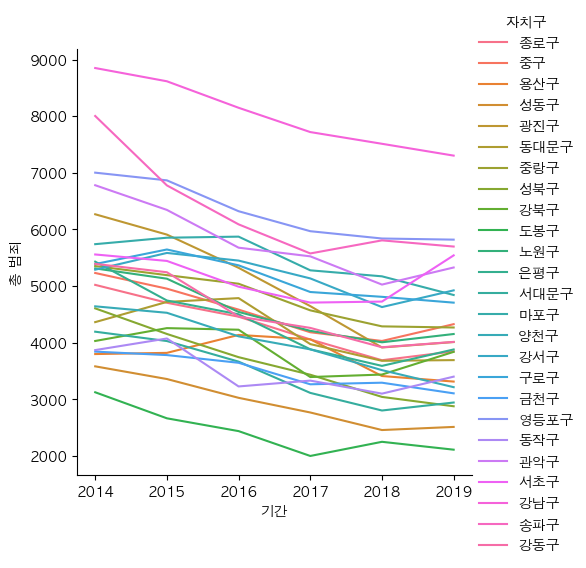

In [72]:
# plot
f = sns.relplot(
    data = crime_data,
    x = '기간',
    y = '총 범죄',
    hue = '자치구',
    kind = 'line',
)

# options
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.1, fontsize=2) # 1.05 밖에 표시
plt.show()

### 서울시 구별 범죄유형별 발생 횟수

각 구에서 범죄유형별 발생 횟수를 살펴봅시다. 

##### 문제18. 각 자치구의 범죄 유형별 발생횟수의 합계를 구하세요. 

자치구별로 묶어서 합계를 구한 후, 각 범죄 데이터만 남겨보겠습니다. 

In [73]:
crime_data.head()

,기간,자치구,총 범죄,살인,강도,강간/추행,절도,폭력,총 발생대비검거,살인 발생대비검거,강도 발생대비검거,강간/추행 발생대비검거,절도 발생대비검거,폭력 발생대비검거
2,2014,종로구,5021,3,12,226,2272,2508,0.918144,100.000000,100.0,100.000000,56.382042,94.059011
3,2014,중구,5231,6,13,221,2576,2415,0.609444,83.333333,100.0,72.850679,34.433230,87.867495
4,2014,용산구,3799,1,7,213,1560,2018,0.615952,100.000000,100.0,79.342723,33.461538,81.268583
5,2014,성동구,3582,1,5,141,1753,1682,0.571748,100.000000,100.0,73.049645,30.176840,83.769322
6,2014,광진구,6268,8,16,249,3167,2828,0.563338,100.000000,100.0,79.919679,31.607199,81.329562


In [74]:
# 보고 싶은 columns
# [['살인', '강도', '강간/추행', '절도', '폭력']]

df_crime_type = crime_data.groupby('자치구').agg('sum')[['살인', '강도', '강간/추행', '절도', '폭력']]
df_crime_type

/var/folders/yj/661v5ck10fs9l1w83h2th0300000gn/T/ipykernel_31858/1901399701.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_crime_type = crime_data.groupby('자치구').agg('sum')[['살인', '강도', '강간/추행', '절도', '폭력']]


,살인,강도,강간/추행,절도,폭력
자치구,,,,,
강남구,53,136,3350,20436,24179
강동구,27,62,986,11355,14862
강북구,42,57,1131,7505,14449
강서구,54,45,1642,12051,17220
관악구,52,76,2142,14052,18361
광진구,33,62,1531,14693,13752
구로구,45,59,1610,11980,17119
금천구,33,44,1081,7849,11924
노원구,33,38,1087,10912,15284


##### 문제19. 각 구의 총 범죄수를 막대그래프로 표현하세요
- 조건1: 각 범죄유형을 색으로 구분하여 표현하세요
- 조건2: 하나는 누적 막대그래프로 하나는 누적을 해제한 형태의 막대그래프로 출력하세요. 
- 조건3: pandas의 plot 메서드를 활용하세요

각 자치구별 각 범죄유형별 수를 누적막대그래프로 표현해보겠습니다. 

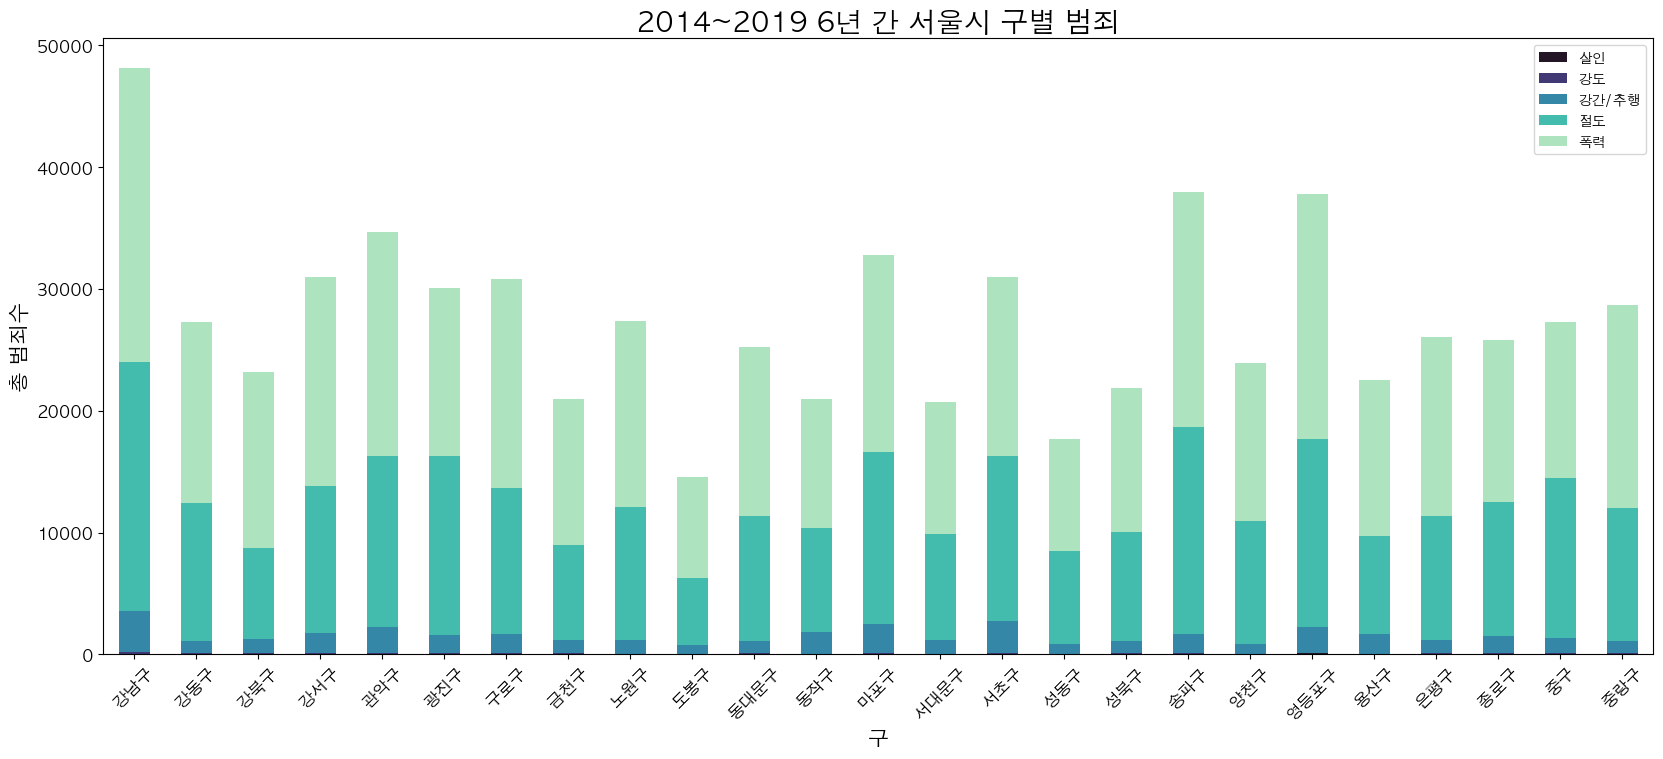

In [75]:
from matplotlib.colors import ListedColormap

df_crime_type.plot(
    kind = 'bar',
    stacked = True,
    colormap=ListedColormap(sns.color_palette("mako", 10)), 
    figsize=(20,8))


plt.title("2014~2019 6년 간 서울시 구별 범죄", fontsize=20) #제목
plt.xlabel('구', fontsize=15)  #x축 명
plt.ylabel('총 범죄수', fontsize=15) #y축 명

plt.xticks(rotation=45) #x축 라벨 글자 45도 회전
plt.xticks(fontsize=12) #x축 라벨 글자 크기
plt.yticks(fontsize=12) #y축 라벨 글자 크기

plt.show()

위 그래프에서 누적을 해제하면 아래와 같이 표현됩니다. 

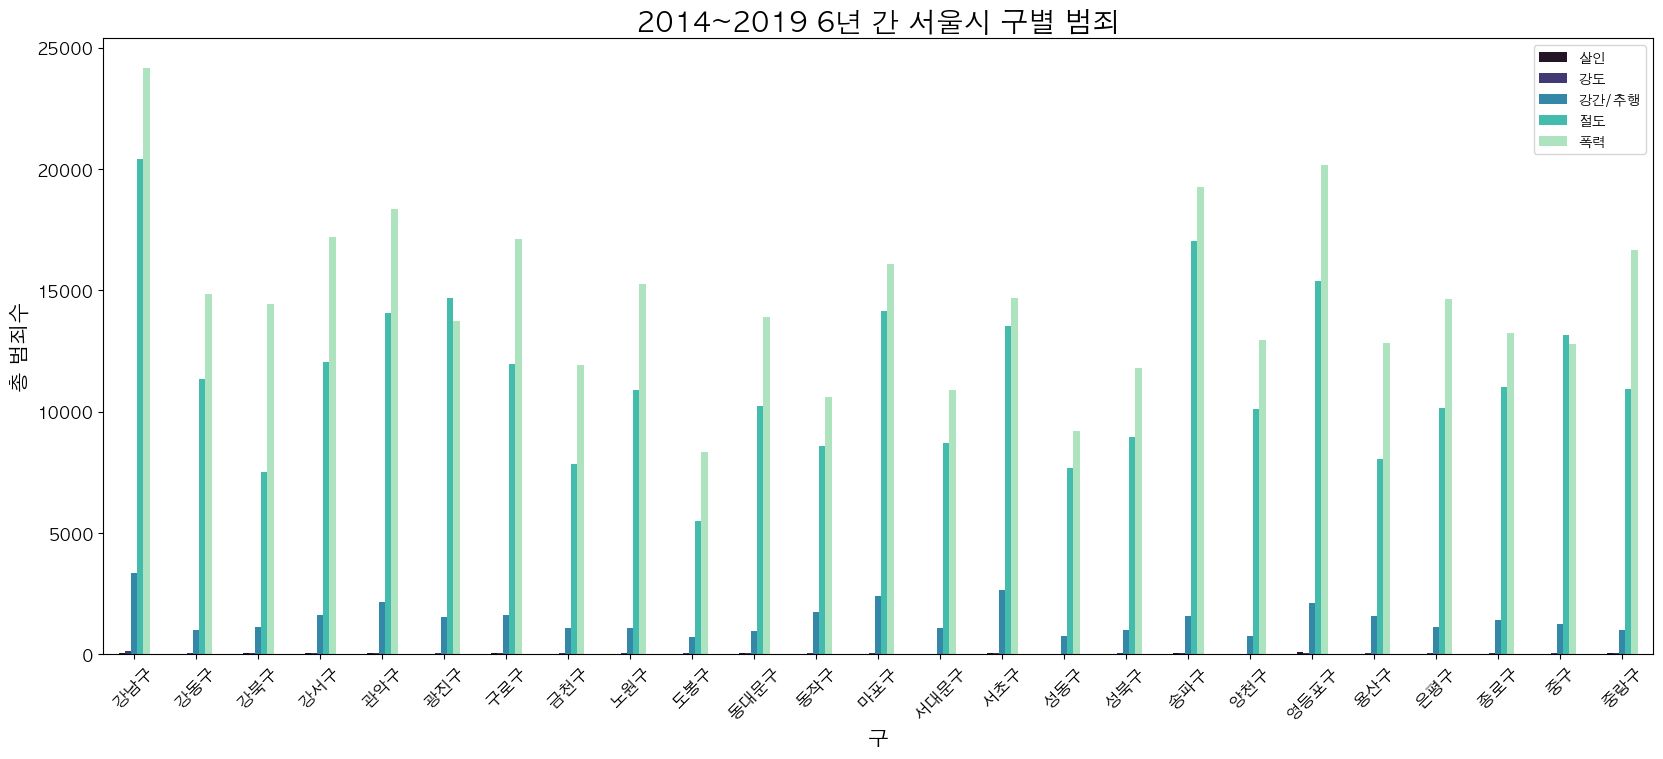

In [76]:
# 직접 채워보세요 
from matplotlib.colors import ListedColormap

####
df_crime_type.plot(
                kind='bar',
                stacked=False,
                colormap=ListedColormap(sns.color_palette("mako", 10)),
                figsize=(20, 8)
)
####

plt.title("2014~2019 6년 간 서울시 구별 범죄", fontsize=20) #제목
plt.xlabel('구', fontsize=15)  #x축 명
plt.ylabel('총 범죄수', fontsize=15) #y축 명

plt.xticks(rotation=45) #x축 라벨 글자 45도 회전
plt.xticks(fontsize=12) #x축 라벨 글자 크기
plt.yticks(fontsize=12) #y축 라벨 글자 크기

plt.show()

### 서울시 각 범죄유형의 구별 발생 횟수

각 구별로 범죄유형별 범죄수를 그래프로 한번에 표현하기 위하여, 데이터프레임을 조금 변형해보겠습니다. 

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://pandas.pydata.org/docs/reference/api/pandas.melt.html

##### 문제20. 범죄 유형이 칼럼이 아니라 변수로 표현되도록 데이터 프레임을 변형하세요. 

In [77]:
df_crime_type

,살인,강도,강간/추행,절도,폭력
자치구,,,,,
강남구,53,136,3350,20436,24179
강동구,27,62,986,11355,14862
강북구,42,57,1131,7505,14449
강서구,54,45,1642,12051,17220
관악구,52,76,2142,14052,18361
광진구,33,62,1531,14693,13752
구로구,45,59,1610,11980,17119
금천구,33,44,1081,7849,11924
노원구,33,38,1087,10912,15284


In [78]:
df_crime_type_2 = df_crime_type.reset_index(level='자치구')
df_crime_type_2

,자치구,살인,강도,강간/추행,절도,폭력
0,강남구,53,136,3350,20436,24179
1,강동구,27,62,986,11355,14862
2,강북구,42,57,1131,7505,14449
3,강서구,54,45,1642,12051,17220
4,관악구,52,76,2142,14052,18361
5,광진구,33,62,1531,14693,13752
6,구로구,45,59,1610,11980,17119
7,금천구,33,44,1081,7849,11924
8,노원구,33,38,1087,10912,15284
9,도봉구,15,38,704,5483,8344


In [79]:
df_crime_type_2 = df_crime_type_2.melt(
    id_vars = ['자치구'],
    var_name = '범죄 유형',
    value_name = '수'
)
df_crime_type_2

,자치구,범죄 유형,수
0,강남구,살인,53
1,강동구,살인,27
2,강북구,살인,42
3,강서구,살인,54
4,관악구,살인,52
...,...,...,...
120,용산구,폭력,12849
121,은평구,폭력,14667
122,종로구,폭력,13251
123,중구,폭력,12802


##### 문제21. 범죄유형별로 자치구별 범죄수를 막대그래프로 표현하세요. 

범죄 유형별로 자치구별 범죄수를 표현하되, 살인, 강도와 다른 범죄의 스케일 차이가 크기 때문에 따로 그려보겠습니다. 

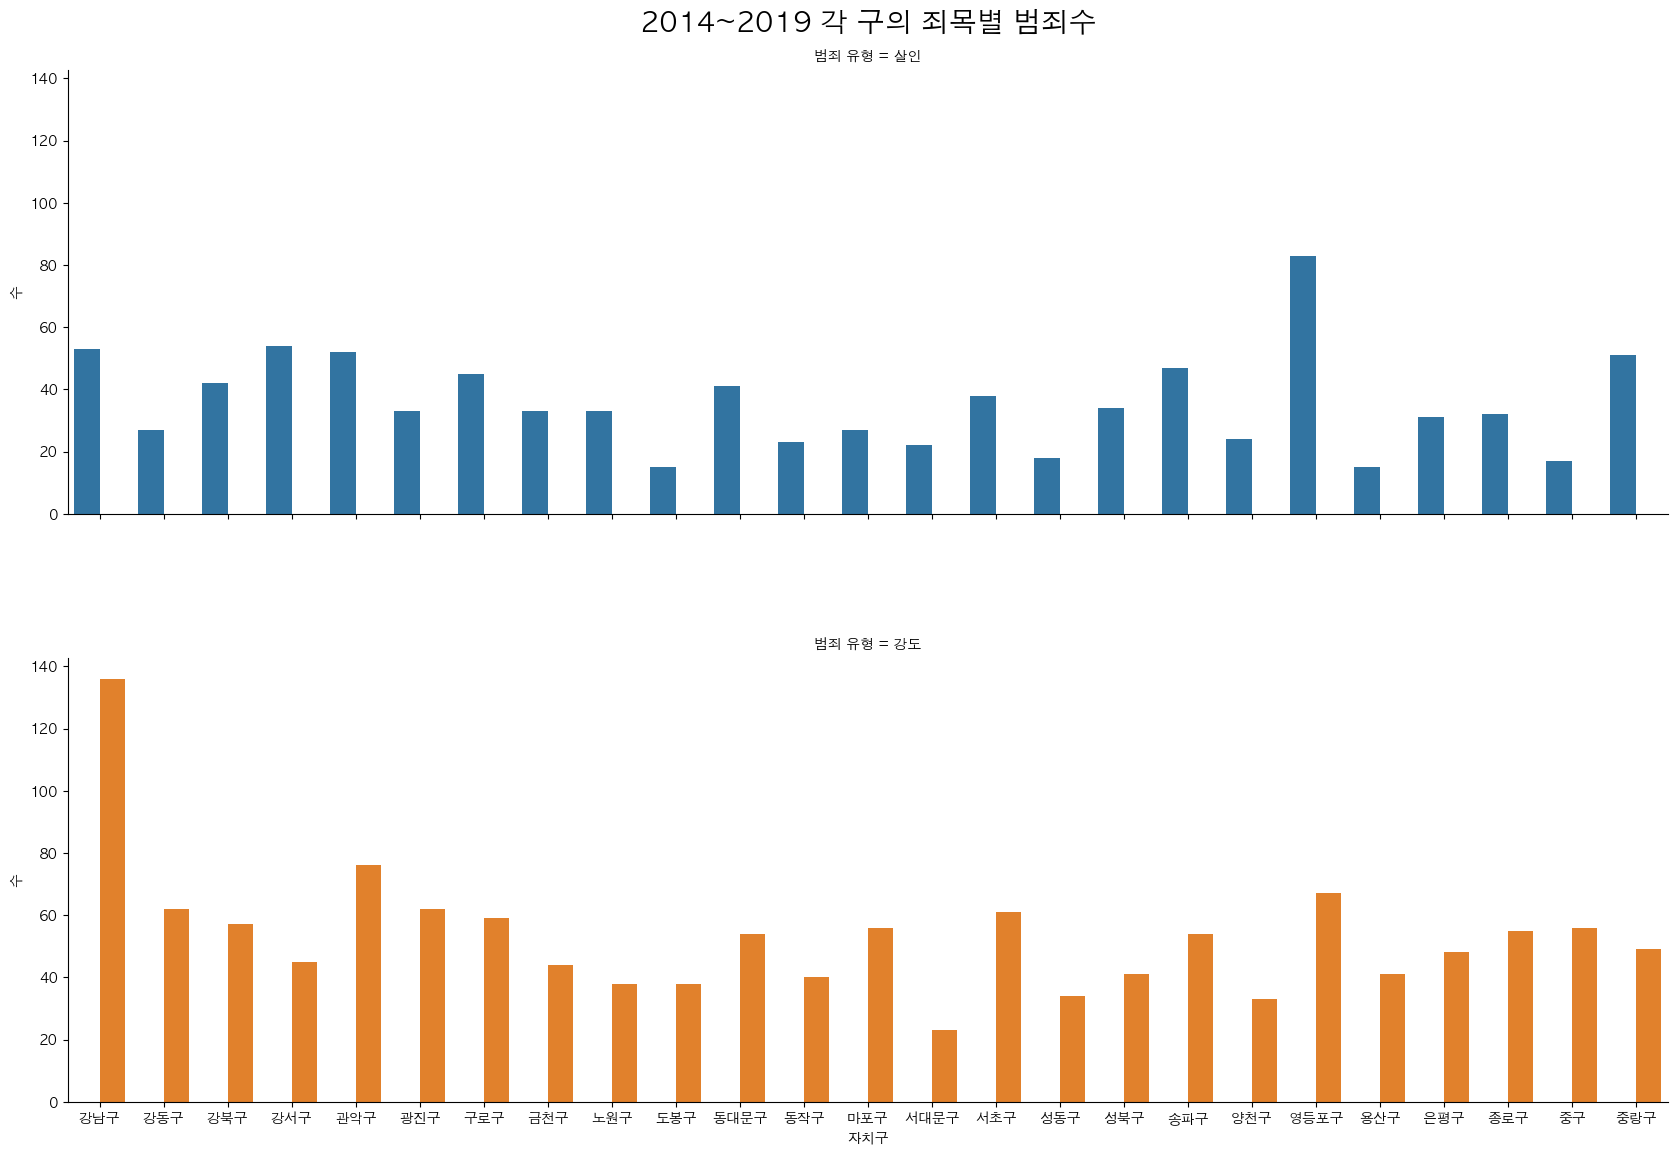

In [95]:
cat1 = df_crime_type_2['범죄 유형']=='살인'
cat2 = df_crime_type_2['범죄 유형']=='강도'
df_div = df_crime_type_2[(cat1) | (cat2)]
# 데이터프레임에서 '살인', '강도' 데이터만 분리하여 그래프 그리기
f = sns.catplot(
    kind = 'bar',
    data = df_div,
    x = '자치구',
    y = '수',
    hue = '범죄 유형',
    col = '범죄 유형',
    col_wrap = 1,
    height = 2,
    aspect = 3
)

f.fig.suptitle('2014~2019 각 구의 죄목별 범죄수', fontsize= 20) # 제목
f.fig.set_size_inches(20, 12) # 사이즈 
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.07) #여백조절
plt.show()

In [94]:
cat1 = df_crime_type_2['범죄 유형']=='살인'
cat2 = df_crime_type_2['범죄 유형']=='강도'
df_crime_type_2[cat1 | cat2]

,자치구,범죄 유형,수
0,강남구,살인,53
1,강동구,살인,27
2,강북구,살인,42
3,강서구,살인,54
4,관악구,살인,52
5,광진구,살인,33
6,구로구,살인,45
7,금천구,살인,33
8,노원구,살인,33
9,도봉구,살인,15


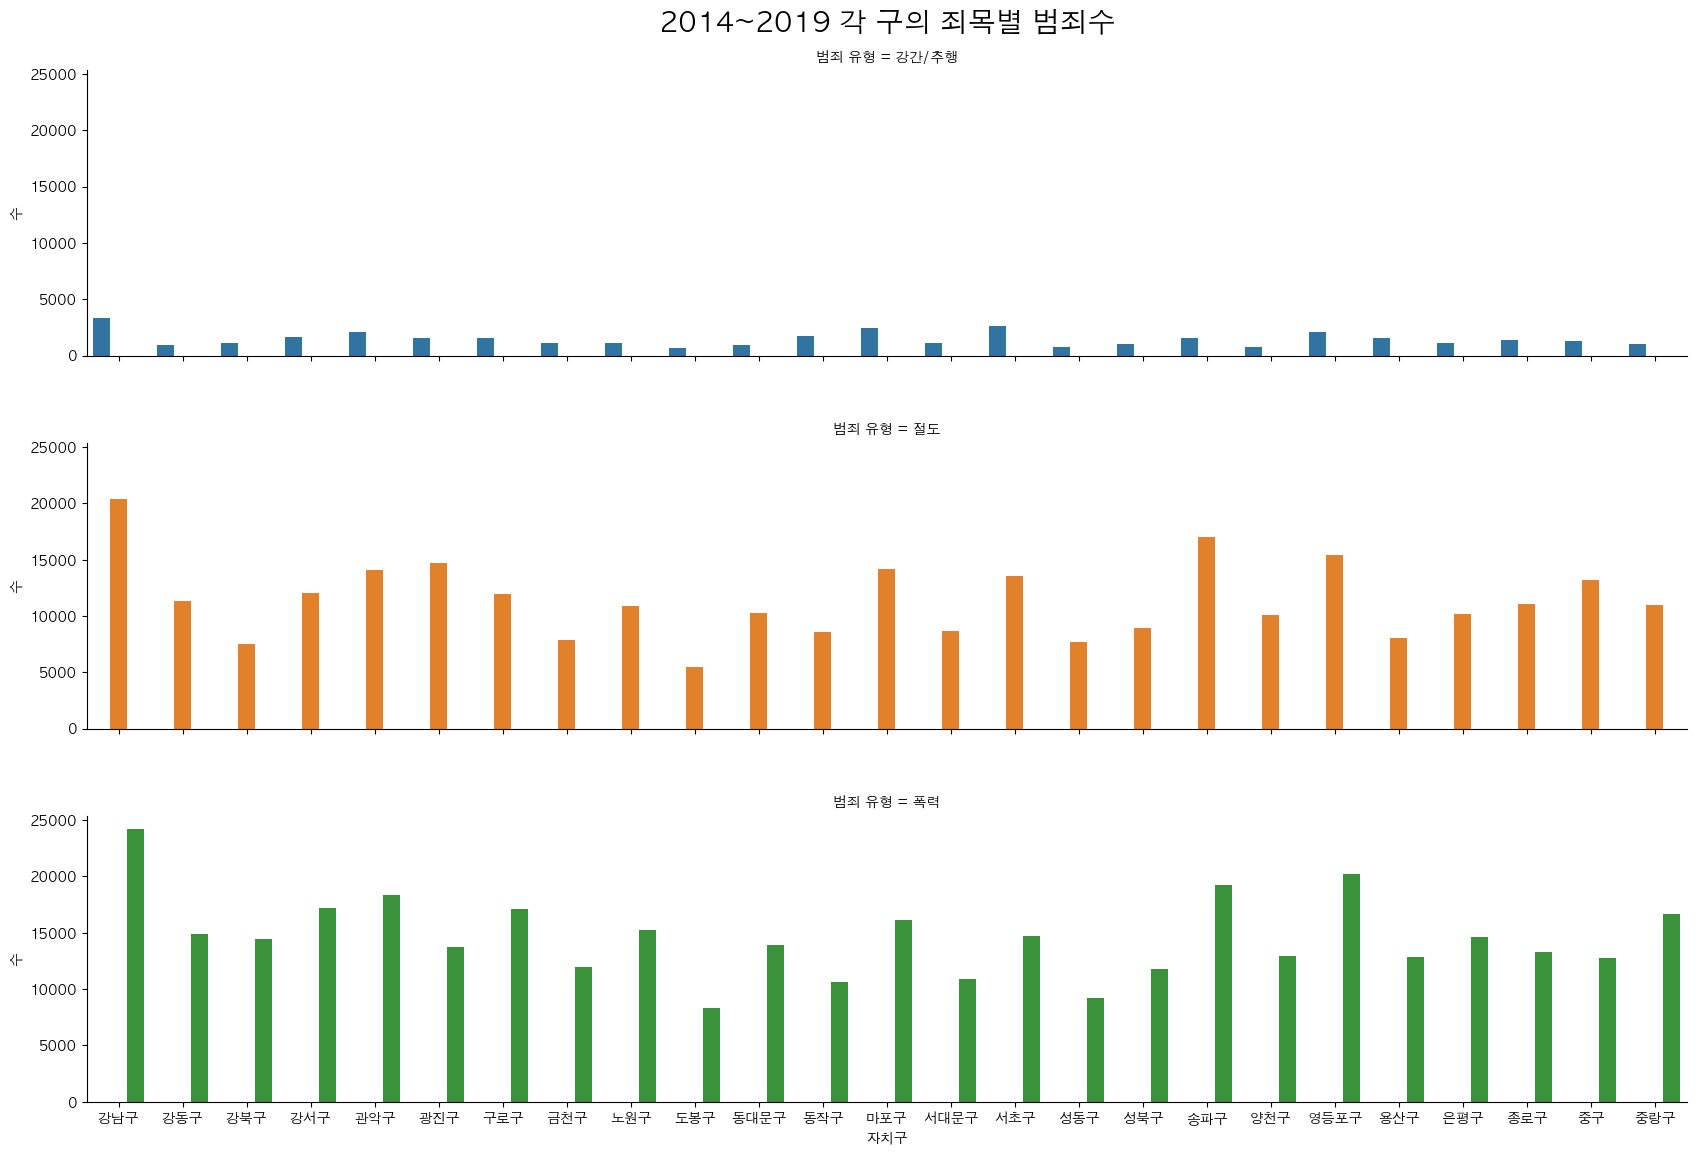

In [96]:
# 직접 해보세요! 
cat1 = df_crime_type_2['범죄 유형']=='강간/추행'
cat2 = df_crime_type_2['범죄 유형']=='절도'
cat3 = df_crime_type_2['범죄 유형']=='폭력'

f = sns.catplot(
    kind = 'bar',
    data =  df_crime_type_2[cat1 | cat2 | cat3],
    x = '자치구',
    y = '수',
    hue = '범죄 유형',
    col = '범죄 유형',
    col_wrap = 1,
    height = 2,
    aspect = 3
)


f.fig.suptitle('2014~2019 각 구의 죄목별 범죄수', fontsize= 20)
f.fig.set_size_inches(20, 12)
plt.subplots_adjust(left=0.1, right=0.9, top=0.93, bottom=0.07)
plt.show()